# PA 1: Exploratory Analysis over Dataset_python

## Student Details

Student Name and ID:Darshan Subodhbhai Savaliya(1002030998),Harsh Jitendra Thakkar(1001996152),Avish Nitinbhai Modi 	               (1002069301)


Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'dataset_python.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
<b>[2.5 points]</b>

 ## Assignment Details

In this assignment, you will explore, manipulate and play with the data.

You will prepare a report with the following outline for each one of the dataset. Look at the following Example.

1.	Introduction

2.	Retrieving the Data

3.	Glimpse of Data

4.	Check for missing data

5.	Data Exploration

6.  Include a paragraph describing the contribution made by each team member


You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Python, Weka and R. DO Task 1, Task 2, Task 3, Task 4 using Python, Weka, R.
 
**Out of the 3 datasets listed below:**

**1. Dataset_python should be solved using Python in Jupyter notebook only.**

**2. Dataset_Weka using WEKA**

**3. Dataset_R using R**


You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

# Dataset Details

In this assignment, you will work on dataset_python. The columns of the dataset are:

- age - age of the individual
- employment - Type of job
- fw - the number of people the census believes the entry represents
- education - Type of education
- years-education - the number of years of education
- marital-status - check relationship status
- job - Type of occupation
- bond - Relationship status
- race - origin of the individual
- gender - gender of the individual
- capital-gain - capital gain for the individual
- capital-loss -  capital loss for the individual
- hours-per-week - number of hours worked by the individual
- native-country - Country of origin
- income > 50K - range of the income of the corresponding individual

## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA.

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'dataset_python.csv' must be in the same folder as this file.

In [29]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('dataset_python.csv', encoding='latin1')
#return the first 5 rows of the dataset
df_data.head()

,age,employment,fw,education,years-education,marital-status,job,bond,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income > 50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,Yes
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,No
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,Yes
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,No
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,No


# Task 1: Statistical Exploratory Data Analysis (17.5 points)
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [30]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.
# 5 points
#Task 1-a: Print the details of the df_data data frame (information such as dimensionality, names of features (note that there's no target variable here), statistical details, etc)
print("Dimensionality of the DataFrame: ", df_data.shape)

print("Features in the DataFrame: ", list(df_data.columns))

print("Statistical details of the DataFrame: ")
print(df_data.describe())
# 5 points
#Task 1-b: Print names of all the countries used in the dataset with the number of their occurences
country_count = df_data['native-country'].value_counts().to_dict() 
print(country_count)
# 5 points
#Task 1-c: Print the number of duplicated rows in the dataset and remove the duplicated rows
print("Number of duplicated rows in the DataFrame: ")
print( df_data.duplicated().sum())
df_data.drop_duplicates(inplace=True)
# 5 points
#Task 1-d: Some of the entries in the columns are undefined. Determine which columns contain these undefined entries and print the count of these undefined entries for each column respectively.
print ("Number of all the columns and the count of undefined entries for each column:")
undefined_columns = df_data.isnull().sum()
print (undefined_columns)


Dimensionality of the DataFrame:  (44003, 15)
Features in the DataFrame:  ['age', 'employment', 'fw', 'education', 'years-education', 'marital-status', 'job', 'bond', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income > 50K']
Statistical details of the DataFrame: 
                age            fw  years-education  capital-gain  \
count  44003.000000  4.400300e+04     44003.000000  44003.000000   
mean      38.620617  1.896754e+05        10.074904   1093.042929   
std       13.735749  1.058612e+05         2.575028   7566.990327   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.174960e+05         9.000000      0.000000   
50%       37.000000  1.781000e+05        10.000000      0.000000   
75%       48.000000  2.376580e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  44003.000000    44003.000000  
mea

# Task 2: Aggregation & Filtering & Rank (30 points)
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [21]:
# 5 points
# Task 2-a: Find out how many (count) Masters have Exec-managerial job
dfC = df_data[(df_data['education']=='Masters') & (df_data['job']=='Exec-managerial')]
print("How many Masters have Exec-managerial job",dfC.shape[0])
# 10 points
# Task 2-b: Retrieve and print the records of Americans (United States) with private employment who have been putting in more than 30 hours a week of work.
dfC2 = df_data[(df_data['native-country']=='United-States') & (df_data['employment']=='Private') & (df_data['hours-per-week']>30)]
print(dfC2)
# 5 points
# Task 2-c: Print the count of each type of employment for United States
print("Total count of each type of employment for United States")
print(df_data.employment.value_counts())
# 10 points
# Task 2-d: Fetch and print the records of people having doctoral degrees and are divorced.  
dfC3 = df_data[(df_data['education']=='Doctorate') & (df_data['marital-status']=='Divorced')]
print(dfC3)

       age employment      fw     education  years-education  \
0       67    Private  366425     Doctorate               16   
1       17    Private  244602          12th                8   
2       31    Private  174201     Bachelors               13   
3       58  State-gov  110199       7th-8th                4   
4       25  State-gov  149248  Some-college               10   
...    ...        ...     ...           ...              ...   
43952   52    Private   68982     Bachelors               13   
43953   19    Private  116562       HS-grad                9   
43954   30    Private  197947  Some-college               10   
43955   46    Private   97883     Bachelors               13   
43956   30    Private  375827       HS-grad                9   

           marital-status                job            bond   race  gender  \
0                Divorced    Exec-managerial   Not-in-family  White    Male   
1           Never-married      Other-service       Own-child  White    Ma

# Task 3: Visualization (30 points)
You will carry out a number of visualization tasks to develop some intuition about the data. Exploration relies heavily on visualization. For plotting, you can use either Matplotlib or Seaborn. It's possible that the default figures produced by Matplotlib might look a bit dull. So, if you want better figures, you might want to try Seaborn. Seaborn features a wide range of styles. Feel free to try them out and pick the one you like. 10 points will be awarded for your visualizations' aesthetics.

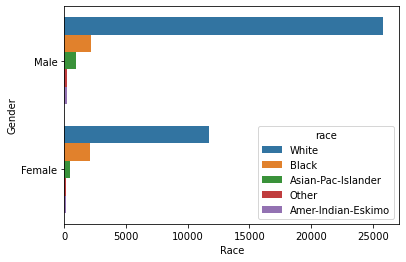

gender  race              
Female  White                 11692
        Black                  2082
        Asian-Pac-Islander      465
        Amer-Indian-Eskimo      164
        Other                   142
Male    White                 25838
        Black                  2135
        Asian-Pac-Islander      906
        Amer-Indian-Eskimo      257
        Other                   231
Name: race, dtype: int64


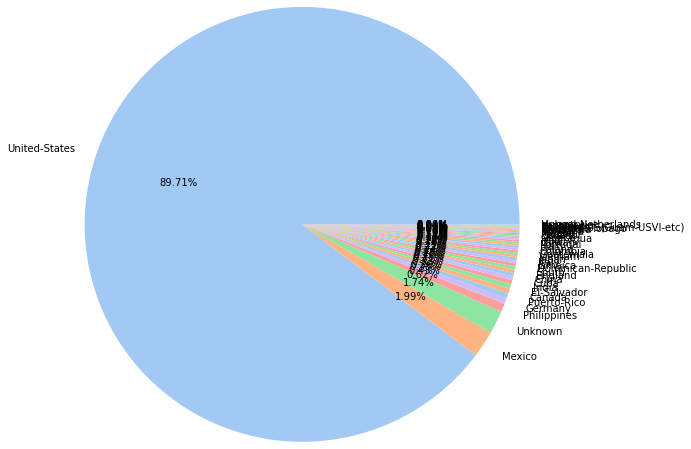

In [22]:
# 10 points
# Task 3-a: Display the countplot of race for each of the genders (in a single plot)
dbe = df_data.groupby('gender').race.value_counts() 
sns.countplot(y='gender',hue = 'race',data=df_data)
plt.ylabel('Gender')
plt.xlabel('Race')
plt.show()
print(dbe)
# 20 points
# Task 3-b: Display a pie chart that represents native country and display percentages in legend respectively
country_count = df_data['native-country'].value_counts().to_dict()
labels = []
data = []
for i in country_count:
    labels.append(i)
    data.append(country_count[i])
    

colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors,autopct = "%0.2f%%",radius = 2.5)
plt.show()


# Task 4: Insights from the data (20 points)
Find out 'interesting' information from the dataset. Give two insights and Create a visualization for each of the insights. Explain in a few lines your reasoning. 

Your work's uniqueness and quality will be taken into account when evaluating your work (having a meaningful result and an aesthetic visualization). 

Text(0, 0.5, 'employment')

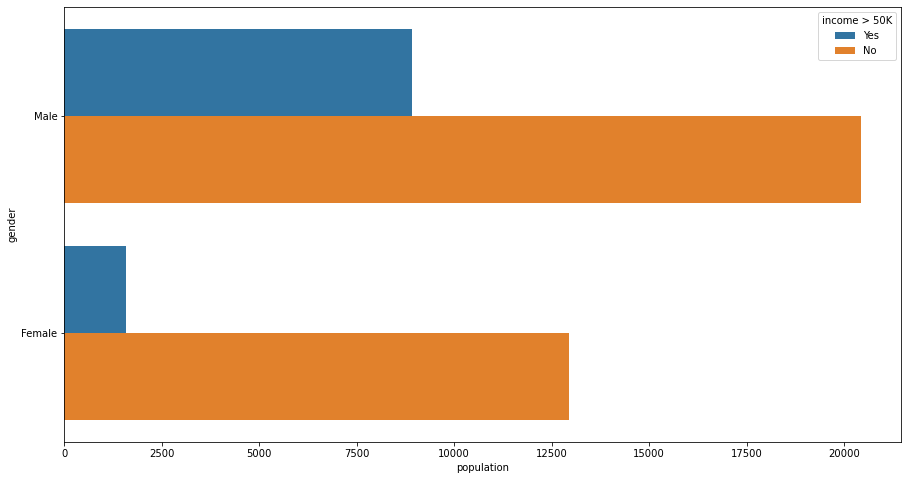

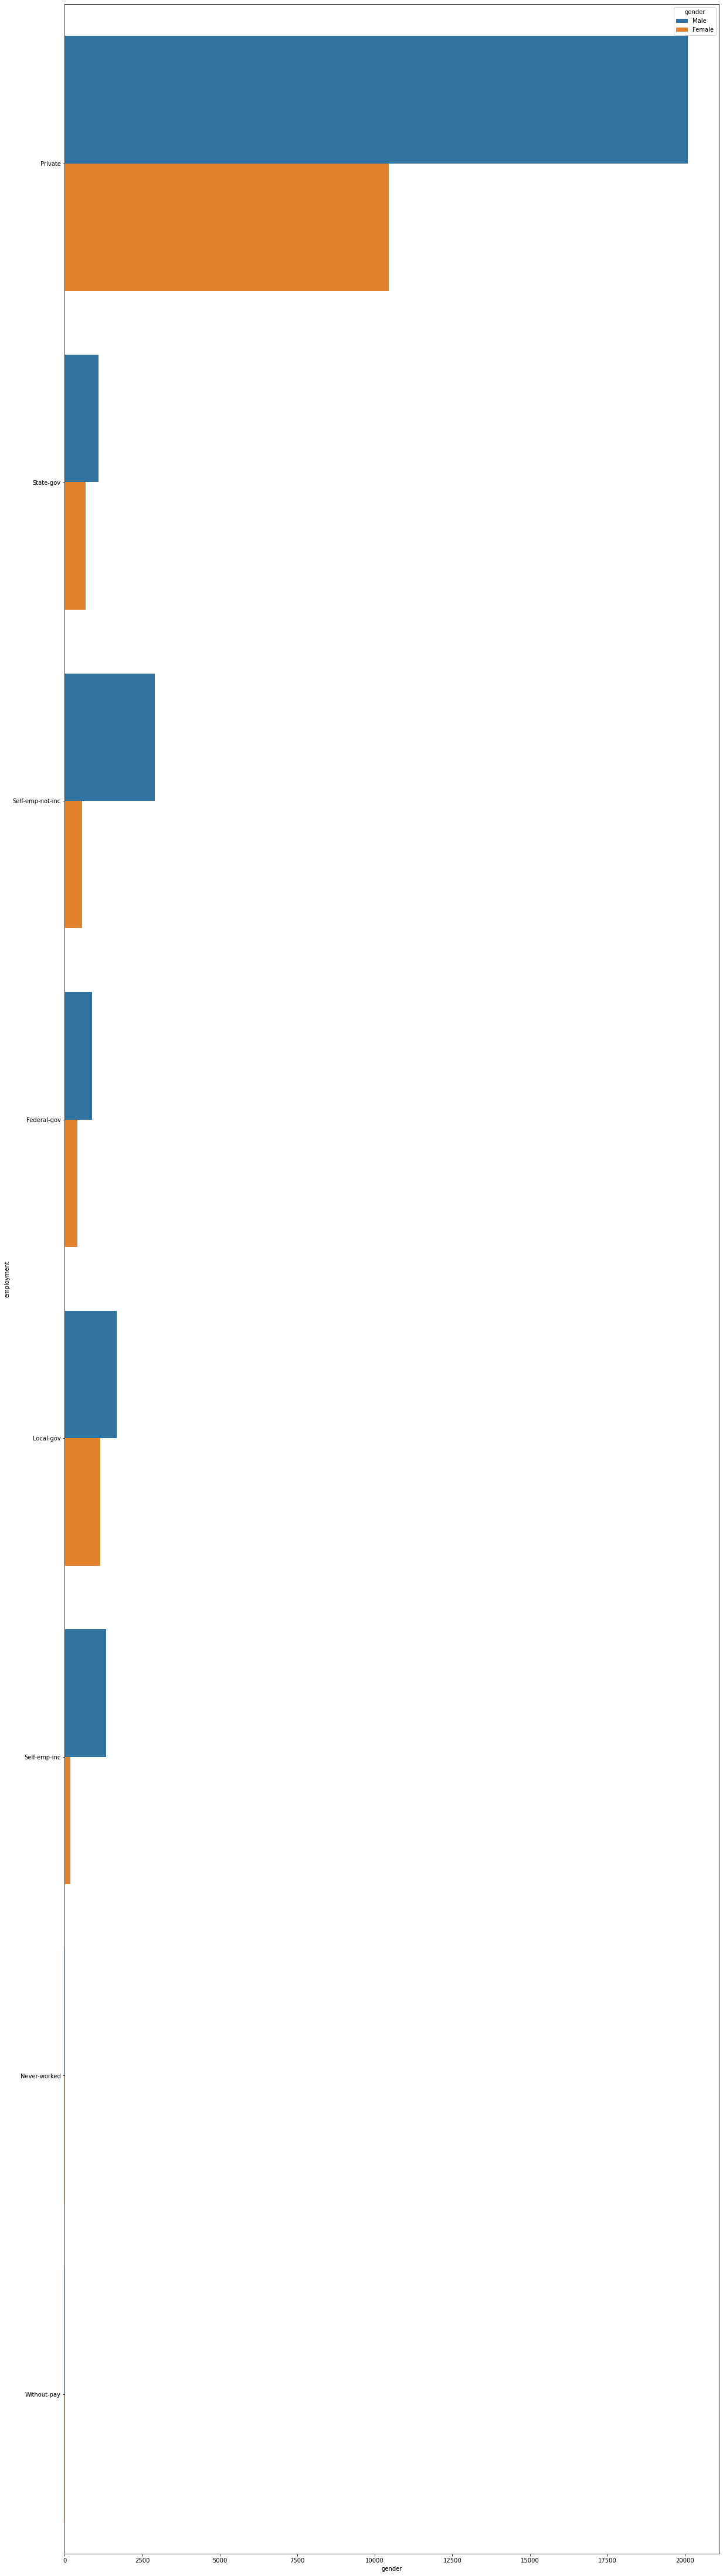

In [23]:
# Code and explanation for Task4
# Code and explaination for Task4

# we have compared the income (>50k) with gender to identify the gender pay gap. Here we can clearly see more male make more than 50K compared to female there is a big gender pay gap in the dataset. We can also see the total population of male employed is far more than number of female employed. 
plt.figure(figsize = (15, 8)) 
sns.countplot(y = 'gender', hue = 'income > 50K', data = df_data) 
plt.xlabel('population') 
plt.ylabel('gender') 


# We have compared the gender and their employment. Here we can see that in all employment type male leade female. Its close to double in private, state-gov and Federal-gov employment. Additionally the employment gap is even bigger in Self-emp-not-inc and self-emp-inc in the given data set.
plt.figure(figsize = (20, 80)) 
sns.countplot(y = 'employment', hue = 'gender', data = df_data) 
plt.xlabel('gender') 
plt.ylabel('employment')